In [16]:
from ultralytics import YOLO
import cv2
import supervision as sv
import torch

In [2]:
!nvidia-smi

Fri May  2 12:32:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.20             Driver Version: 570.133.20     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        Off |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P8             18W /  200W |    1770MiB /  12282MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install ultralytics

## Run inference

In [3]:
image_path = f"/home/lastinm/PROJECTS/FINAL/test_img/card26_jpg.rf.9defe96ac5b853d3f84650575dc86d39.jpg"
image_path1 = '/home/lastinm/PROJECTS/credit_cards_detection/dataset/coco/test/1742460932138_resized_jpg.rf.0ee03bf49164c59d1ff4b929d05132cf.jpg'
image_path2 = '/home/lastinm/PROJECTS/credit_cards_detection/dataset/coco/test/1742460932095_resized_jpg.rf.8db93580eb26ebfc3f87db415cf4f1df.jpg'

In [ ]:
def prepare_image(image_path):
    model = YOLO(f'/home/lastinm/PROJECTS/credit_cards_detection/train/YOLOv12/runs/detect/train3/weights/best.pt')
    image = cv2.imread(image_path)

    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results).with_nms()

    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    sv.plot_image(annotated_image)

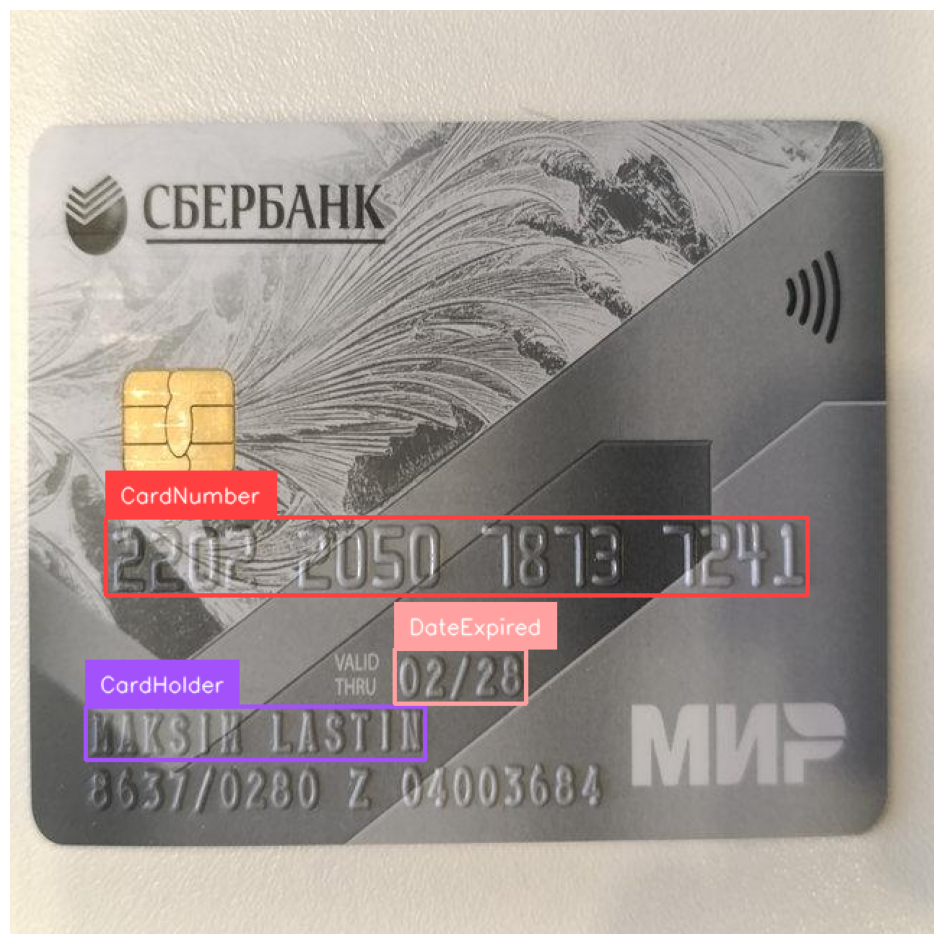

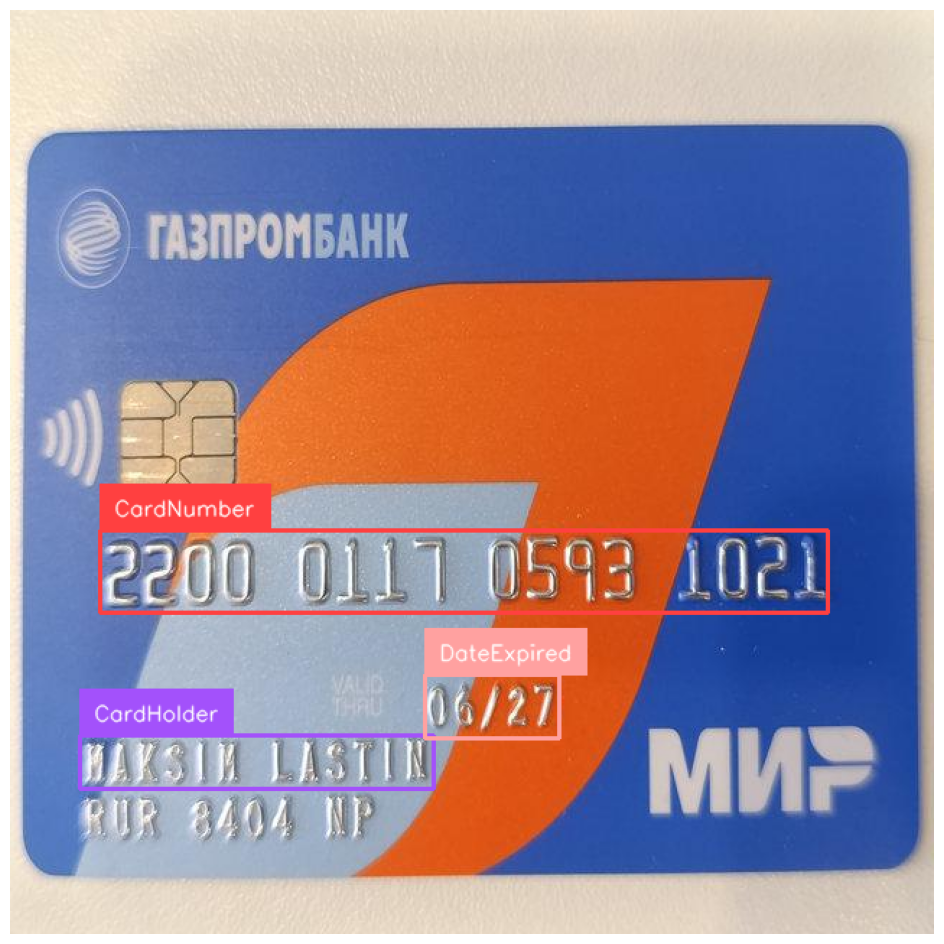

In [7]:
prepare_image(image_path1)
prepare_image(image_path2)

# ОТОБРАЗИТЬ РЕЗУЛЬТАТ ЧЕРЕЗ MATHPLOTLIB

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def visualize_results_matplotlib(image_path, results, class_names):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)
    
    #colors = ['red', 'green', 'blue', 'yellow', 'purple']
    colors = ['green', 'blue', 'yellow', 'purple']
    
    for box, score, cls in zip(results['boxes'], results['scores'], results['classes']):
        x1, y1, x2, y2 = map(int, box)
        rect = patches.Rectangle(
            (x1, y1), x2-x1, y2-y1,
            linewidth=2, edgecolor=colors[cls % len(colors)], facecolor='none'
        )
        ax.add_patch(rect)
        
        plt.text(
            x1, y1-10, f"{class_names[cls]}: {score:.2f}",
            color=colors[cls % len(colors)], fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8)
        )
    
    plt.axis('off')
    plt.show()

In [ ]:
def process_image(image_path):
    # 1. Детекция на изображении
    model = YOLO(f'/home/lastinm/PROJECTS/credit_cards_detection/train/YOLOv12/runs/detect/train3/weights/best.pt')
    image = cv2.imread(image_path)

    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results).with_nms()

    # 2. Визуализация
    #class_names = ["Background", "Cardholder", "CardNumber", "DateExpired"]  # Faster R-CNN
    class_names = ["Cardholder", "CardNumber", "DateExpired"]

    # Собираем результаты в словарь, как в Faster R-CNN
    results = {
        'boxes': torch.tensor(detections.xyxy),  # [N, 4] (x1, y1, x2, y2)
        'scores': torch.tensor(detections.confidence),  # [N]
        'classes': torch.tensor(detections.class_id, dtype=torch.int64),  # [N]
    }

    visualize_results_matplotlib(image_path, results, class_names)

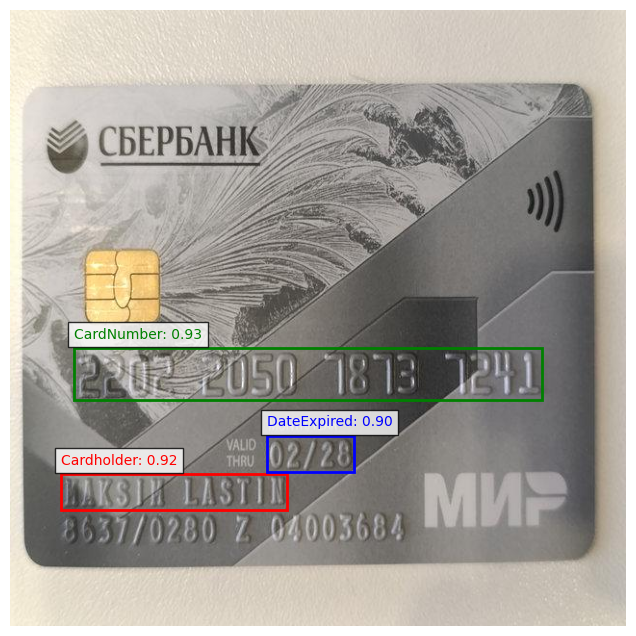

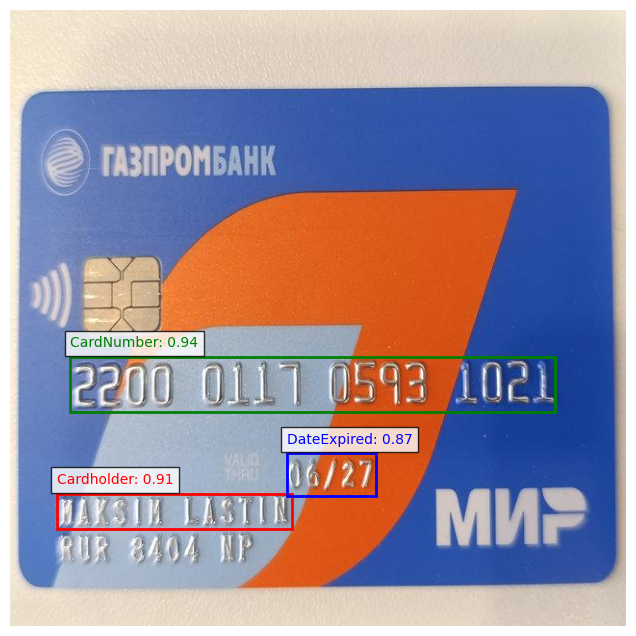

In [18]:
process_image(image_path1)
process_image(image_path2)